<a href="https://colab.research.google.com/github/dkm4/Computer-vision-project-FashionMNIST-/blob/main/Computer_vision_project(FashionMNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the relevant libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchvision import datasets
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


# Download the Dataset

In [8]:
train_dataset = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor(), target_transform=None)
test_dataset  = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor(), target_transform=None)

# Let's look at what exactly we got

In [9]:
print(f"Type of training dataset:{type(train_dataset)}, length of dataset:{len(train_dataset)}")
print(f"Type of testing dataset:{type(test_dataset)}, length of dataset:{len(test_dataset)}")

Type of training dataset:<class 'torchvision.datasets.mnist.FashionMNIST'>, length of dataset:60000
Type of testing dataset:<class 'torchvision.datasets.mnist.FashionMNIST'>, length of dataset:10000


In [10]:
image, label = train_dataset[0]
print(f"{type(image)}, {image.shape}")
print(f"{type(label)}, my label is {label}")

<class 'torch.Tensor'>, torch.Size([1, 28, 28])
<class 'int'>, my label is 9


In [11]:
class_names = train_dataset.classes
print("My class names are ")
print(class_names)

My class names are 
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Plot one image

Text(0.5, 1.0, 'Ankle boot')

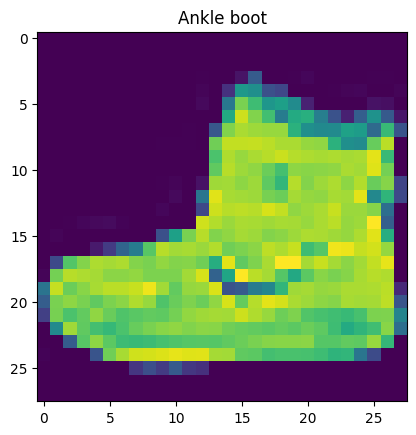

In [12]:
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

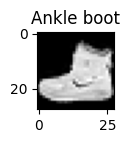

In [13]:
fig = plt.figure(figsize=(1, 1))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

In [14]:
random_idx = torch.randint(0, len(train_dataset), size=[1]).cpu().item()
print(random_idx)

41285


# Let's plot many images

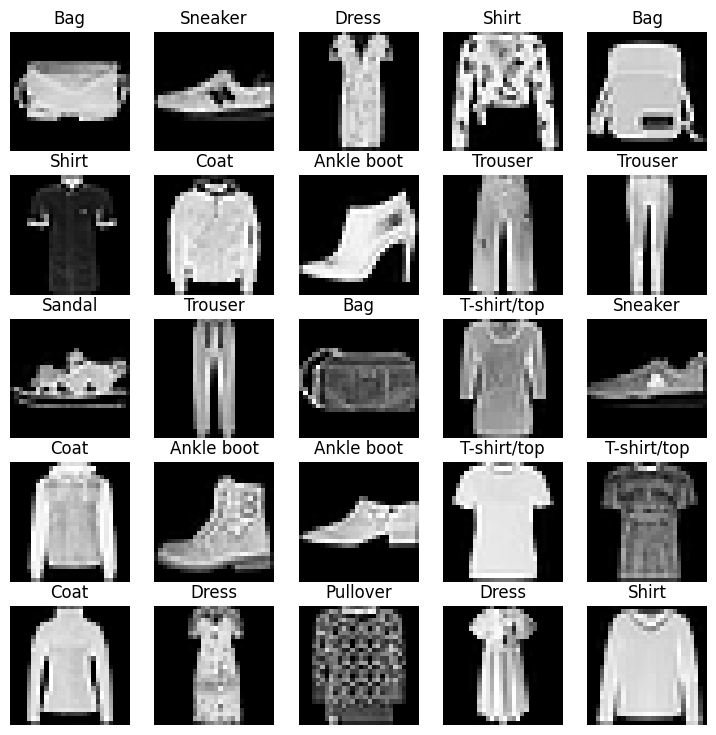

In [15]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


# Create Dataloaders

In [16]:
BATCH_SIZE = 32
training_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
testing_dataloader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Visualize it

In [17]:
print(f"Length of my dataloader:{len(training_dataloader)}")
print(f"Length of my dataloader:{len(testing_dataloader)}")

Length of my dataloader:1875
Length of my dataloader:313


In [18]:
312*32+16

10000

In [19]:
1875*32

60000

In [20]:
for batch_idx, i in enumerate(testing_dataloader):
  print(f"batch:{batch_idx+1} and number of points are {len(i[0])}")

batch:1 and number of points are 32
batch:2 and number of points are 32
batch:3 and number of points are 32
batch:4 and number of points are 32
batch:5 and number of points are 32
batch:6 and number of points are 32
batch:7 and number of points are 32
batch:8 and number of points are 32
batch:9 and number of points are 32
batch:10 and number of points are 32
batch:11 and number of points are 32
batch:12 and number of points are 32
batch:13 and number of points are 32
batch:14 and number of points are 32
batch:15 and number of points are 32
batch:16 and number of points are 32
batch:17 and number of points are 32
batch:18 and number of points are 32
batch:19 and number of points are 32
batch:20 and number of points are 32
batch:21 and number of points are 32
batch:22 and number of points are 32
batch:23 and number of points are 32
batch:24 and number of points are 32
batch:25 and number of points are 32
batch:26 and number of points are 32
batch:27 and number of points are 32
batch:28 a

In [21]:
train_features_batch, train_labels_batch = next(iter(training_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# Digression

In [22]:
flatten_layer = nn.Flatten()
random_tensor = torch.rand((32, 1, 28, 28))
flatten_layer(random_tensor).shape


torch.Size([32, 784])

# Create our neural network

In [34]:
class FashionNN(nn.Module):
  def __init__(self, in_features, out_features, hidden_layer=20):
    super().__init__()
    self.layer = nn.Sequential(
                              nn.Flatten(),
                              nn.Linear(in_features=in_features, out_features=hidden_layer),
                               nn.ReLU(),
                               nn.Linear(in_features=hidden_layer, out_features=out_features),
                               )

  def forward(self, x):
    return self.layer(x)


model = FashionNN(28*28, len(class_names))
# model.state_dict()

In [ ]:
random_tensor = torch.rand((32, 784))
print(f"input tensor shape is {random_tensor.shape}")
print(f"output tensor shape is {model(random_tensor).shape}")

In [29]:
random_tensor = torch.rand((32, 1, 28, 28))
print(f"input tensor shape is {random_tensor.shape}")
print(f"output tensor shape is {model(random_tensor).shape}")

input tensor shape is torch.Size([32, 1, 28, 28])
output tensor shape is torch.Size([32, 10])


# Loss function and optimizer

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Utility functions

In [36]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_true))*100.0
  return acc

def train_step(model, training_dataloader, loss_fn, optimizer, device):
  train_loss = 0
  train_acc = 0
  model.train()
  for batch_idx, item in enumerate(training_dataloader):
    X_batch, y_batch = item
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    model.to(device)
    logits = model(X_batch)
    training_loss = loss_fn(logits, y_batch)
    train_loss += training_loss
    y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
    training_acc = acc_fn(y_batch, y_preds)
    train_acc+=training_acc
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
  print(f"My training loss: {train_loss/len(training_dataloader)} Training acc:{train_acc/len(training_dataloader)}")


def test_step(model, testing_dataloader, loss_fn, device):
  test_loss = 0
  test_acc  = 0
  model.eval()
  with torch.no_grad():
    for batch_idx, item in enumerate(testing_dataloader):
      X_batch, y_batch = item
      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)
      model.to(device)
      logits = model(X_batch)
      testing_loss = loss_fn(logits, y_batch)
      test_loss += testing_loss
      y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
      testing_acc = acc_fn(y_batch, y_preds)
      test_acc+=testing_acc
  print(f"My testing loss: {test_loss/len(testing_dataloader)} Training acc:{test_acc/len(testing_dataloader)}")

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [38]:
from tqdm.auto import tqdm
epochs = 50
for epoch in tqdm(range(epochs)):
  print(f"My epoch {epoch}\n-----------")
  train_step(model, training_dataloader, loss_fn, optimizer, device)
  test_step(model, testing_dataloader, loss_fn, device)
  print("\n\n")

  0%|          | 0/50 [00:00<?, ?it/s]

My epoch 0
-----------
My training loss: 1.06486976146698 Training acc:67.28
My testing loss: 0.7124236226081848 Training acc:76.43769968051119



My epoch 1
-----------
My training loss: 0.6281040906906128 Training acc:79.36333333333333
My testing loss: 0.6030067205429077 Training acc:79.56269968051119



My epoch 2
-----------
My training loss: 0.5509440302848816 Training acc:81.64666666666666
My testing loss: 0.549794614315033 Training acc:81.25



My epoch 3
-----------
My training loss: 0.5127771496772766 Training acc:82.72833333333334
My testing loss: 0.5227323770523071 Training acc:82.01876996805112



My epoch 4
-----------
My training loss: 0.4889063835144043 Training acc:83.38
My testing loss: 0.5068756937980652 Training acc:82.47803514376997



My epoch 5
-----------
My training loss: 0.4729089140892029 Training acc:83.90333333333334
My testing loss: 0.4929259717464447 Training acc:82.86741214057508



My epoch 6
-----------
My training loss: 0.4605744481086731 Training acc:

In [39]:
torch.save(model.state_dict(), 'model.pth')